In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
# init_printing()

## Initialise Variables

In [3]:
x, y, u, v = symbols('x y u v')
rho, p = symbols('rho p')
k, eps = symbols('k epsilon')
c0 = symbols('c_0')

In [4]:
def get_sym_grad(scal_f):
    """
    Returns the symbolic gradient of a scalar function.
    """
    x, y = symbols('x y')
    grad_f = Matrix([diff(scal_f, x), diff(scal_f, y)])
    return grad_f

def get_sym_div(vec_f):
    """
    Returns the symbolic divergence of a vector function.
    """
    x, y = symbols('x y')
    div_f = diff(vec_f[0], x) + diff(vec_f[1], y)
    return div_f

## Setup Constants

In [5]:
L = 1
Cd = 0.09
sigma_k = 1.0
sigma_eps = 1.3
C1eps = 1.44
C2eps = 1.92

## Setup variables

In [6]:
u = -cos(2*pi*x)*sin(2*pi*y)
v = sin(2*pi*x)*cos(2*pi*y)
vmag = sqrt(u**2 + v**2)
u, v

(-sin(2*pi*y)*cos(2*pi*x), sin(2*pi*x)*cos(2*pi*y))

In [7]:
p = -0.25*(cos(4*pi*x) + cos(4*pi*y))
rho = (p*7/c0**2 + 1)**(1/7)
p, rho

(-0.25*cos(4*pi*x) - 0.25*cos(4*pi*y),
 (1 + (-1.75*cos(4*pi*x) - 1.75*cos(4*pi*y))/c_0**2)**0.142857142857143)

In [19]:
U = 1
k = 1.5*U*U
eps = pow(0.09, 0.75)*pow(k, 1.5)/L
k, eps

(1.5, 0.3018691769624716)

## Calculate RHS of k-eps equations

In [20]:
grad_u = Matrix([[diff(u, x), diff(u, y)], [diff(v, x), diff(v, y)]])
S = (grad_u + grad_u.T)/2
frob_S = sqrt(S[0, 0]**2 + 2*S[0, 1]**2 + S[1, 1]**2)
frob_S, S, grad_u

(2*sqrt(2)*pi*sqrt(sin(2*pi*x)**2*sin(2*pi*y)**2),
 Matrix([
 [2*pi*sin(2*pi*x)*sin(2*pi*y),                             0],
 [                           0, -2*pi*sin(2*pi*x)*sin(2*pi*y)]]),
 Matrix([
 [2*pi*sin(2*pi*x)*sin(2*pi*y), -2*pi*cos(2*pi*x)*cos(2*pi*y)],
 [2*pi*cos(2*pi*x)*cos(2*pi*y), -2*pi*sin(2*pi*x)*sin(2*pi*y)]]))

In [21]:
grad_k = get_sym_grad(k)
grad_eps = get_sym_grad(eps)
grad_k, grad_eps

(Matrix([
 [0],
 [0]]),
 Matrix([
 [0],
 [0]]))

In [22]:
Pk = Cd * sqrt(2) * frob_S
Pk

0.36*pi*sqrt(sin(2*pi*x)**2*sin(2*pi*y)**2)

### k equation

In [42]:
k_div = get_sym_div((k*k/eps)*grad_k)
k_rhs = (Cd/sigma_k)*k_div + Pk - eps
k_rhs

0.36*pi*sqrt(sin(2*pi*x)**2*sin(2*pi*y)**2) - 0.301869176962472

### eps equation

In [43]:
eps_div = get_sym_div((k*k/eps)*grad_eps)
eps_rhs = (Cd/sigma_eps)*eps_div + C1eps*eps*Pk/k - C2eps*eps*eps/k
eps_rhs

0.10432598755823*pi*sqrt(sin(2*pi*x)**2*sin(2*pi*y)**2) - 0.11664

## Numerical Substitution

In [44]:
def numerical_subs(sym_var, _x, _y, debug=False):
    func = lambdify((x, y), sym_var, 'numpy')
    if debug:
        print(func.__doc__)
        return
    return func(_x, _y)

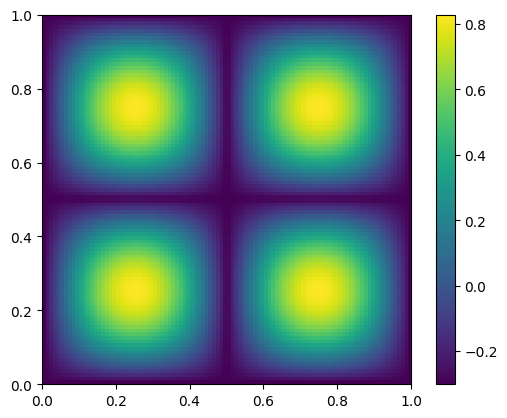

In [45]:
# Plot vmag for a square domain between 0 and L
_x = np.linspace(1e-5, L, 100)
_x, _y = np.meshgrid(_x, _x)
_u = numerical_subs(u, _x, _y)
_v = numerical_subs(v, _x, _y)
_vmag = np.sqrt(_u**2 + _v**2)
_p = numerical_subs(p, _x, _y)
_rho = numerical_subs(rho, _x, _y)

_k = numerical_subs(k, _x, _y)
_eps = numerical_subs(eps, _x, _y)

_k_rhs = numerical_subs(k_rhs, _x, _y)
_eps_rhs = numerical_subs(eps_rhs, _x, _y)

plt.imshow(_k_rhs, origin='lower', extent=(0, L, 0, L))
plt.colorbar()

## Import from code

In [15]:
from test_k_eps import get_test_solution

d:\IIT Bombay - Miscellaneous\Winter Project\ddp-thesis\code\energy_spectrum.py:29: UserWarning: Numba not installed. Some functions will not be compiled.
  warnings.warn(


In [16]:
_u, _v, _p, _rho, _k, _eps, _k_rhs, _eps_rhs = get_test_solution(
    _x=_x, _y=_y, c0=10
)

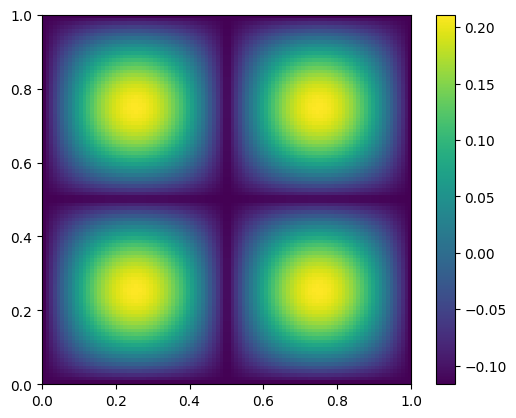

In [17]:
plt.imshow(_eps_rhs, origin='lower', extent=(0, L, 0, L))
plt.colorbar()

# Compare exact and numerical solutions

In [20]:
# Read .npz file
# data = np.load('D:\\IIT Bombay - Miscellaneous\\Winter Project\\ddp-thesis\\test_k_eps_output\\results.npz')
data.files

['t', 'x', 'y', 'k_rhs', 'eps_rhs', 'k_rhs_ex', 'eps_rhs_ex']

In [24]:
def get_limits(x):
    lims = (np.min(x), np.max(x))
    return lims

t, x, y = float(data['t']), data['x'], data['y']
k_rhs, eps_rhs = data['k_rhs'], data['eps_rhs']
k_rhs_ex, eps_rhs_ex = data['k_rhs_ex'], data['eps_rhs_ex']

In [33]:
k_lim, eps_lim = get_limits(k_rhs), get_limits(eps_rhs)
k_lim_ex, eps_lim_ex = get_limits(k_rhs_ex), get_limits(eps_rhs_ex)
print(k_lim, k_lim_ex)

(-18.228458082172143, 46.49966765075001) (-0.3015901434230706, 0.8288251447904522)


In [40]:
def get_coeffs(ol, nl):
    a = (ol[1] - ol[0])/(nl[1] - nl[0])
    b = ol[0] - a*nl[0]
    return a, b

0.01675257797240176
0.016752577972401705


Text(0.5, 1.0, 'Error in k: 3.38e-06 to 7.37e-01 (mean: 9.93e-02)')

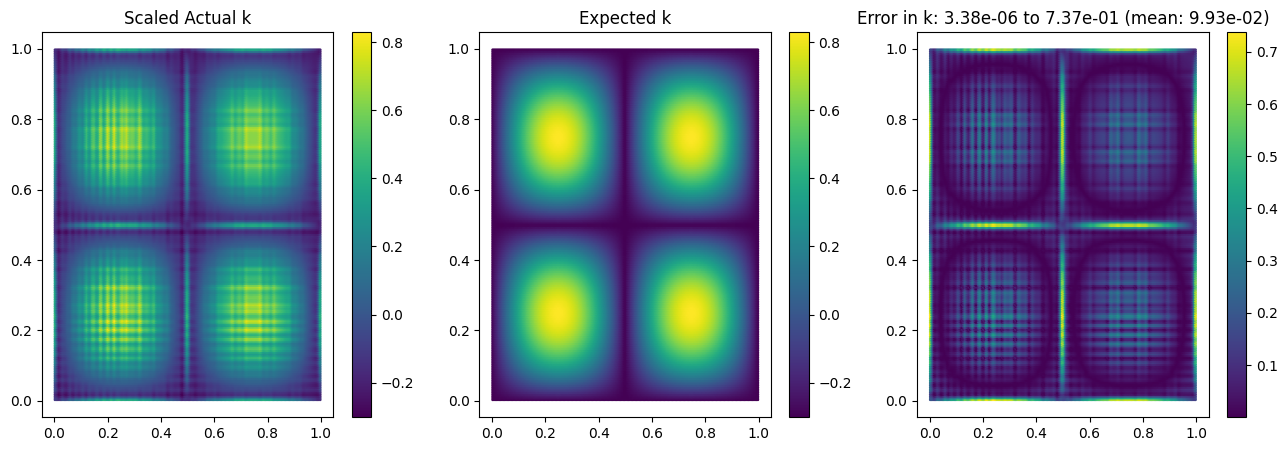

: 

In [52]:
k_a, k_b = get_coeffs(k_lim_ex, k_lim)
k_scld = k_a*k_rhs + k_b
k_err = np.abs(k_scld - k_rhs_ex)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.scatter(x, y, c=k_scld, s=1)
plt.colorbar()
plt.title('Scaled Actual k')
plt.subplot(132)
plt.scatter(x, y, c=k_rhs_ex, s=1)
plt.colorbar()
plt.title('Expected k')
plt.subplot(133)
plt.scatter(x, y, c=k_err, s=1)
plt.colorbar()
msg = 'Error in k: {:.2e} to {:.2e}'.format(np.min(k_err), np.max(k_err))
msg += f' (mean: {np.mean(k_err):.2e})'
plt.title(msg)

Text(0.5, 1.0, 'Expected k')

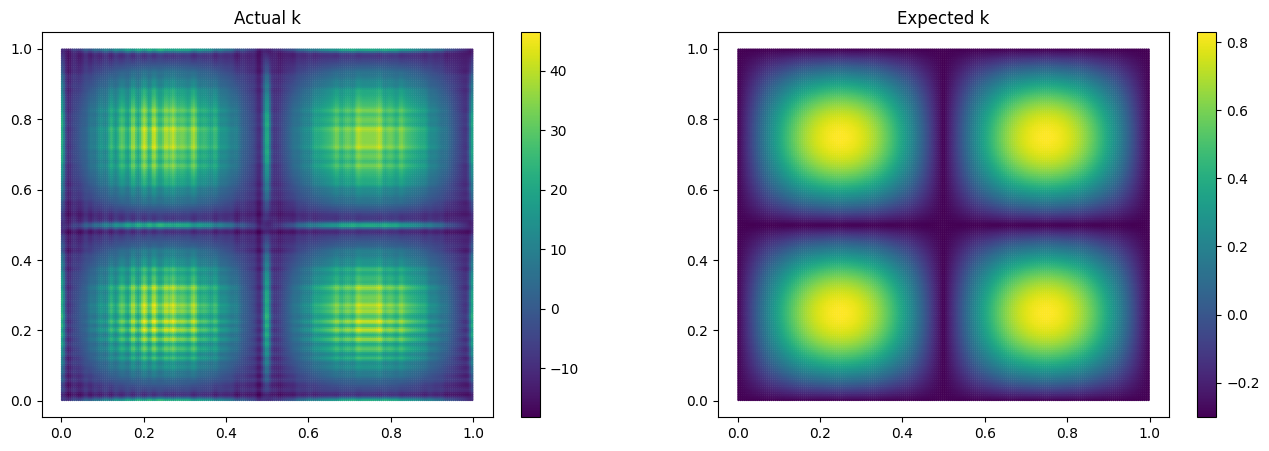

In [45]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.scatter(x, y, c=k_rhs, s=1)
plt.colorbar()
plt.title('Actual k')
plt.subplot(122)
plt.scatter(x, y, c=k_rhs_ex, s=1)
plt.colorbar()
plt.title('Expected k')